In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read train set to dataframe
main_df = pd.read_csv('train_V2.csv')

In [3]:
print(main_df.shape)
main_df.head()

(4446966, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
# Basic information about dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [4]:
# Number of players with percentile greater or equal to 90% 
print("# of players in top 10 places: ", sum(main_df['winPlacePerc'] >= 0.9))

# Number of players with percentile less than or equal to 10%
print("# of players in last 10 places: ", sum(main_df['winPlacePerc'] <= 0.1))

# of players in top 10 places:  469231
# of players in last 10 places:  626592


* Let's plot correlation map for some of the features we are more interested in
* It will give initial idea about each feature's correlation with win percentile

In [6]:
main_df_subset =  main_df[['assists', 'boosts', 'damageDealt', 'DBNOs', 'heals', 'kills', 'revives', 
                           'rideDistance', 'walkDistance', 'swimDistance', 'matchDuration', 'weaponsAcquired',
                                               'winPlacePerc']]

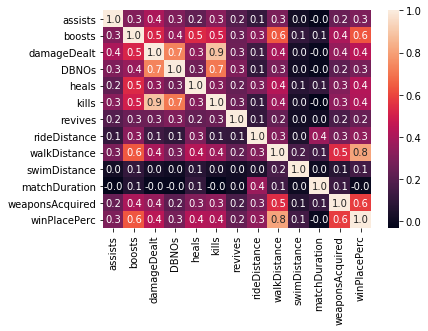

In [16]:
corr = main_df_subset.corr()

sns.heatmap(corr, fmt='.1f', annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

* Let's filter out pairs with correlation >= 0.4 
* This will give us the pairs of correlated features to analyse further

In [34]:
all_pairs = corr.unstack().sort_values(ascending=False).drop_duplicates()

print("Pairs with correlation >= 0.4:")
all_pairs[all_pairs >= 0.4]

Pairs with correlation >= 0.4:


winPlacePerc     winPlacePerc       1.000000
kills            damageDealt        0.888783
walkDistance     winPlacePerc       0.810888
damageDealt      DBNOs              0.735763
DBNOs            kills              0.707848
walkDistance     boosts             0.640150
boosts           winPlacePerc       0.634234
weaponsAcquired  winPlacePerc       0.583806
walkDistance     weaponsAcquired    0.541222
boosts           heals              0.535854
damageDealt      boosts             0.521947
boosts           kills              0.502024
damageDealt      winPlacePerc       0.440507
heals            walkDistance       0.430266
                 winPlacePerc       0.427857
winPlacePerc     kills              0.419916
damageDealt      assists            0.406726
weaponsAcquired  boosts             0.406609
dtype: float64

* Let's explore each feature pair one by one to understand their impact on winPercentile

## Should I walk more or drive more(use vehicle to move around)?

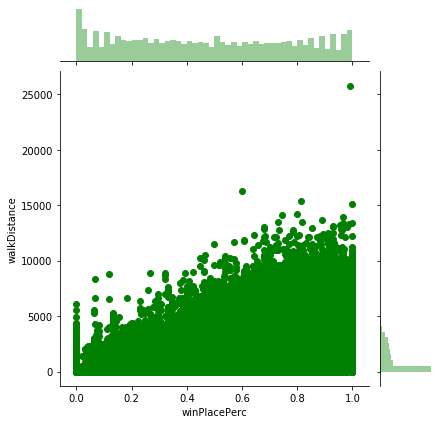

In [57]:
# Jointplot of walkdistance vs winplace percentile 
sns.jointplot(x='winPlacePerc', y='walkDistance', data=main_df_subset, color='green')

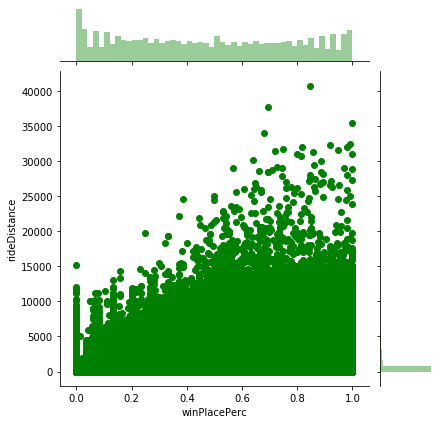

In [58]:
# Jointplot of rideDistane vs winplace percentile 
sns.jointplot(x='winPlacePerc', y='rideDistance', data=main_df_subset, color='green')

> As we can notice from above two plots that, for high win percentile (0.8-1.0), walk distance is highly correlated with winPlacePerc and ride distance has less correlation with winPlacePerc. Hence, It is advisable to walk more than ride to increase your chances of victory

## If I want to cross a river, should I swim or use boat ? 

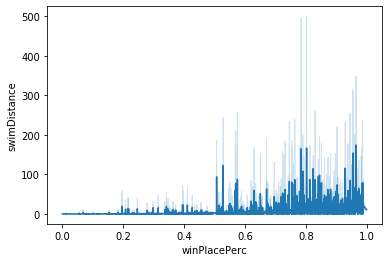

In [43]:
# Lineplot of swimdistance vs winplace percentile 
sns.lineplot(x='winPlacePerc', y='swimDistance', data=main_df_subset)

> Above plot implies that the players who comes in top 20 percentile(0.8-1.0) prefer to swim than use boat to cross a river. I also agree with this outcome. When you swim, it will be difficult for an enemy to spot you in river. If you use boat then you will be spotted right away because of boat's noise. So, better to swim to cross a river than using a boat.

## More kills imply higher chance of winning?

In [46]:
main_df_subset_top10 = main_df_subset[main_df_subset.winPlacePerc >= 0.9]
print("Average # of kills by players who came in top10 percentile: ", round(np.mean(main_df_subset_top10.kills)))

Average # of kills by players who came in top10 percentile:  3


> If you want to increase your chance of coming in top 10 places, get atleast 3 kills ;)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


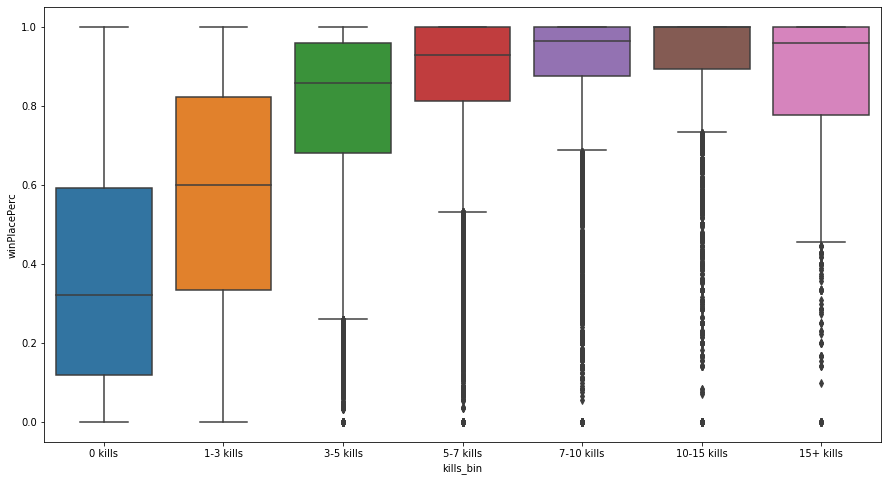

In [48]:
# Dividing kills into 7 different bins for better representation
main_df_subset['kills_bin'] = pd.cut(main_df_subset['kills'], [-1, 0, 3, 5, 7, 10, 15, 100], 
                                            labels=['0 kills','1-3 kills', '3-5 kills', '5-7 kills',
                                                    '7-10 kills', '10-15 kills', '15+ kills'])

# Boxplot of winPlacePerc vs kills
plt.figure(figsize=(15,8))
sns.boxplot(x='kills_bin', y='winPlacePerc', data=main_df_subset)

> This boxplot implies that, 
* Indeed, the more kills you get, the higher the chance of winning!!

## Do boosts help to win the game?

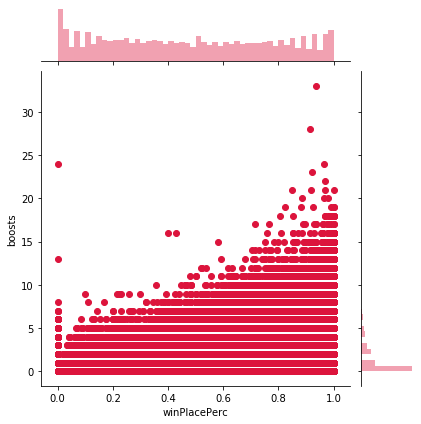

In [59]:
# Boosts vs winPlacePerc
sns.jointplot(x='winPlacePerc', y='boosts', data=main_df_subset, color='crimson')

> Well, this plot clearly shows that boosts have been super important part of players victory. 
* So, Let's explore 'boosts' feature a little more

In [60]:
print("Average # of boosts used by players in top10 percentile: ", round(np.mean(main_df_subset_top10.boosts)))

Average # of boosts used by players in top10 percentile:  4


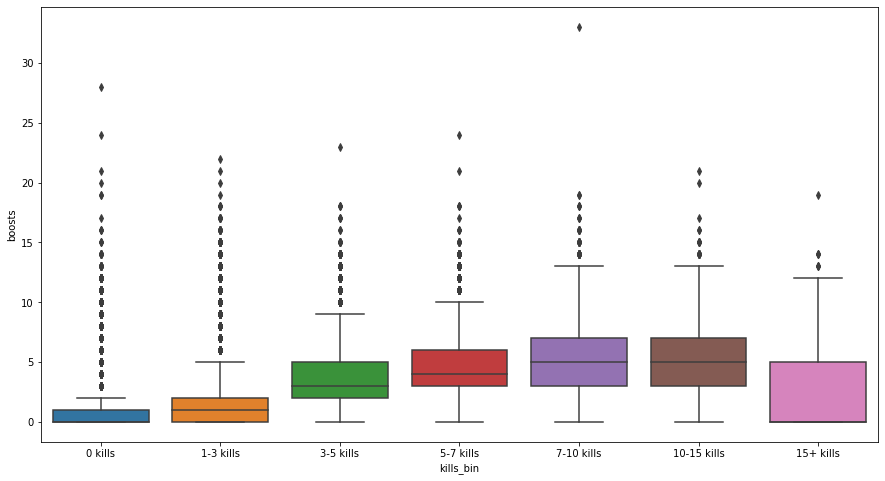

In [66]:
# Boosts vs kills
plt.figure(figsize=(15,8))
sns.boxplot(x='kills_bin', y='boosts', data=main_df_subset)

> Earlier we saw that, more kills can help you secure place in top10 percentile. Above plot depicts that more boostscan really help you in securing more kills. As an ex-pubg player, I agree with this observation. Boost helps player to gain higher agility and movement speed, which in turn might help in getting more kills

## Is that true that if you acquire more weapons during the game, your chances of winning will be higher?

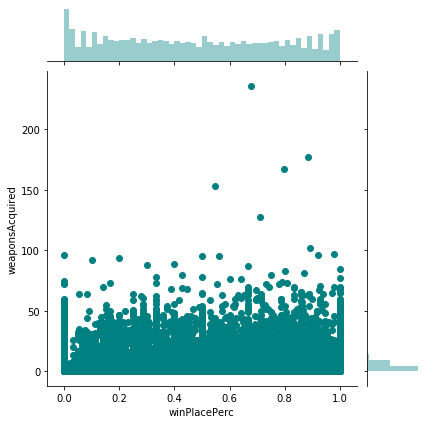

In [71]:
# weapons acquired vs win place percetile 
sns.jointplot(x='winPlacePerc', y='weaponsAcquired', data=main_df_subset, color='teal')

> Though we got relatively high correlation(0.58) between, weaponsAcquired and win percentile, above plot shows that it doesn't seem to be the case. Hence, a player can use only 3-4 different weapons with refill and still win.

## My pubg friend told me that, "Heals(Health packs) can be game changer!"

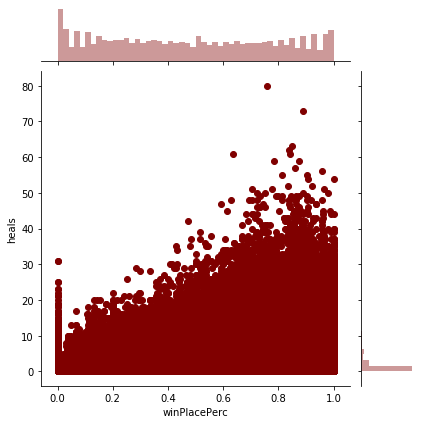

In [72]:
# heals vs win place percetile 
sns.jointplot(x='winPlacePerc', y='heals', data=main_df_subset, color='maroon')

> As players fight till the end, they need more heals. Other players will try to kill you and you need to be alive to win the game. Also, if you are left outside of zone, it will continuously decrease your health. Heal is the only option to get your health back. So, it seems obvious observation that the more heals, the better the chances of your vicotry! 

> **Trivia** : Suppose there are only two players left in the final zone. But, this final zone is at the place where these two players cannot kill/damage each other. For example, i) one player inside underground tunnel and one above ground ii) one player on top of sharp hill and other at the valley. In such cases, **heals** are the only option to survive even when final zone ends!! Basically, when zone ends, remaining players' health will start to decrease at rapid pace. So, if you keep taking heals then you can survive until other player(s) dies inside zone. And voila, you win!!!

## Few interesting findings/facts- maximum value from each feature

In [86]:
# 1) Max DBNOs
print("Sir knocks a lot! - Max DBNOs:", max(main_df.DBNOs))

# 2) Max assists in single match
print("Best assistant! - Max assists in a match:", max(main_df.assists))

# 3) Max number of Boosts
print("On a pill! - Max number of boosts:", max(main_df.boosts))

# 4) Max damage dealt
print("The berserker! - Max damage dealt:", max(main_df.damageDealt))

# 5) Max headshot kills
print("The Sniper! - Max number of headshot kills:", max(main_df.headshotKills))

# 6) Max heals
print("The doctor! - Max number of health packs used in a match:", max(main_df.heals))

# 7) Max kills
print("The killing machine! - Max number of kills in a match:", max(main_df.kills))

# 8) Max match duration
print("Camper! - Longest match ever: %f mins"%(max(main_df.matchDuration)/60))

# 9) Most revives
print("Best Support! - Most number of revives:", max(main_df.revives))

# 10) Max ride distance
print("The F1 Champ! - Max ride distance:", max(main_df.rideDistance), "m")


Sir knocks a lot! - Max DBNOs: 53
Best assistant! - Max assists in a match: 22
On a pill! - Max number of boosts: 33
The berserker! - Max damage dealt: 6616.0
The Sniper! - Max number of headshot kills: 64
The doctor! - Max number of health packs used in a match: 80
The killing machine! - Max number of kills in a match: 72
Camper! - Longest match ever: 37.283333 mins
Best Support! - Most number of revives: 39
The F1 Champ! - Max ride distance: 40710.0 m


In [89]:
# 11) Max road kills
print("The transformer! - Most kills by a vehicle:", max(main_df.roadKills))

# 12) Max swim distance
print("The olympic champ! - Max swim distance:", max(main_df.swimDistance), "m")

# 13) Most team kills
print("The betrayer! - # of times killed a teammate:", max(main_df.teamKills))

# 14) Max vehicle destroyed
print("Vehicle Destroyer! - Max vehicles destroyed:", max(main_df.vehicleDestroys))

# 15) Max walking distance
print("The marathon champ! - Max walk distance:", max(main_df.walkDistance), "m")

# 16) Max weapons acquired
print("The collector! - Max number of weapons acquired:", max(main_df.weaponsAcquired))

The transformer! - Most kills by a vehicle: 18
The olympic champ! - Max swim distance: 3823.0 m
The betrayer! - # of times killed a teammate: 12
Vehicle Destroyer! - Max vehicles destroyed: 5
The marathon champ! - Max walk distance: 25780.0 m
The collector! - Max number of weapons acquired: 236
